**I - Import of the dependencices**

In [143]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer #completing
from sklearn.preprocessing import MinMaxScaler #standardizing of numerical
from sklearn.preprocessing import OneHotEncoder #standardizing of categorical
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline

#les models
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.neighbors import NearestNeighbors

**II - Import of a CSV dataset**

In [144]:
dataframe=pd.read_csv("/home/matthieumouillon/code/matthieumouillon7-glitch/arundelljr_MoneyBaller/MoneyBaller/raw_data/FC26_20250921.csv")

/tmp/ipykernel_9535/3524415879.py:1: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe=pd.read_csv("/home/matthieumouillon/code/matthieumouillon7-glitch/arundelljr_MoneyBaller/MoneyBaller/raw_data/FC26_20250921.csv")


**III - Perform some basic analysis**

In [145]:
dataframe.head(5)

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,252371,/player/252371/jude-bellingham/260004/,26,4,2025-09-19,J. Bellingham,Jude Victor William Bellingham,"CAM, CM",90,94,...,85+3,85+3,83+3,82+3,81+3,81+3,81+3,82+3,18+3,https://cdn.sofifa.net/players/252/371/26_120.png
1,239053,/player/239053/federico-valverde/260004/,26,4,2025-09-19,F. Valverde,Federico Santiago Valverde Dipetta,"CM, CDM, RB",89,90,...,87+3,87+3,86+3,86+3,83+3,83+3,83+3,86+3,18+3,https://cdn.sofifa.net/players/239/053/26_120.png
2,212622,/player/212622/joshua-kimmich/260004/,26,4,2025-09-19,J. Kimmich,Joshua Walter Kimmich,"CDM, RB, CM",89,89,...,87+2,87+2,86+3,85+3,82+3,82+3,82+3,85+3,21+3,https://cdn.sofifa.net/players/212/622/26_120.png
3,235212,/player/235212/achraf-hakimi/260004/,26,4,2025-09-19,A. Hakimi,Achraf Hakimi Mouhأشرف حكيمي,"RB, RM",89,90,...,83+3,83+3,86+3,86+3,81+3,81+3,81+3,86+3,17+3,https://cdn.sofifa.net/players/235/212/26_120.png
4,224232,/player/224232/nicolo-barella/260004/,26,4,2025-09-19,N. Barella,Nicolò Barella,CM,87,87,...,85+2,85+2,84+3,83+3,80+3,80+3,80+3,83+3,19+3,https://cdn.sofifa.net/players/224/232/26_120.png


In [147]:
print(round(dataframe['wage_eur'].mean(),2))

10096.06


In [91]:
#here a first difficulty is to display our dataset. We can display the columns name

In [92]:
dataframe.columns.tolist()

['player_id',
 'player_url',
 'fifa_version',
 'fifa_update',
 'fifa_update_date',
 'short_name',
 'long_name',
 'player_positions',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'league_id',
 'league_name',
 'league_level',
 'club_team_id',
 'club_name',
 'club_position',
 'club_jersey_number',
 'club_loaned_from',
 'club_joined_date',
 'club_contract_valid_until_year',
 'nationality_id',
 'nationality_name',
 'nation_team_id',
 'nation_position',
 'nation_jersey_number',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'player_traits',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_bal

In [93]:
#another solution is to set option max columns
df=dataframe
pd.set_option('display.max_colwidth', None)
df

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,252371,/player/252371/jude-bellingham/260004/,26,4,2025-09-19,J. Bellingham,Jude Victor William Bellingham,"CAM, CM",90,94,...,85+3,85+3,83+3,82+3,81+3,81+3,81+3,82+3,18+3,https://cdn.sofifa.net/players/252/371/26_120.png
1,239053,/player/239053/federico-valverde/260004/,26,4,2025-09-19,F. Valverde,Federico Santiago Valverde Dipetta,"CM, CDM, RB",89,90,...,87+3,87+3,86+3,86+3,83+3,83+3,83+3,86+3,18+3,https://cdn.sofifa.net/players/239/053/26_120.png
2,212622,/player/212622/joshua-kimmich/260004/,26,4,2025-09-19,J. Kimmich,Joshua Walter Kimmich,"CDM, RB, CM",89,89,...,87+2,87+2,86+3,85+3,82+3,82+3,82+3,85+3,21+3,https://cdn.sofifa.net/players/212/622/26_120.png
3,235212,/player/235212/achraf-hakimi/260004/,26,4,2025-09-19,A. Hakimi,Achraf Hakimi Mouhأشرف حكيمي,"RB, RM",89,90,...,83+3,83+3,86+3,86+3,81+3,81+3,81+3,86+3,17+3,https://cdn.sofifa.net/players/235/212/26_120.png
4,224232,/player/224232/nicolo-barella/260004/,26,4,2025-09-19,N. Barella,Nicolò Barella,CM,87,87,...,85+2,85+2,84+3,83+3,80+3,80+3,80+3,83+3,19+3,https://cdn.sofifa.net/players/224/232/26_120.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18400,267946,/player/267946/jun-sub-lim/260004/,26,4,2025-09-19,Lim Jun Sub,Joon-seob Im임준섭,GK,48,54,...,19+2,19+2,16+2,16+2,19+2,19+2,19+2,16+2,47+2,https://cdn.sofifa.net/players/267/946/26_120.png
18401,76593,/player/76593/jianxian-yu/260004/,26,4,2025-09-19,Yu Jianxian,Jianxian Yu,GK,49,56,...,18+2,18+2,16+2,16+2,19+2,19+2,19+2,16+2,48+2,https://cdn.sofifa.net/players/076/593/26_120.png
18402,77205,/player/77205/man-ho-park/260004/,26,4,2025-09-19,Park Man Ho,Man Ho Park,GK,48,59,...,19+2,19+2,17+2,16+2,17+2,17+2,17+2,16+2,47+2,https://cdn.sofifa.net/players/077/205/26_120.png
18403,278149,/player/278149/dipesh-chauhan/260004/,26,4,2025-09-19,D. Chauhan,Dipesh Chauhan,GK,51,61,...,17+2,17+2,17+2,17+2,16+2,16+2,16+2,17+2,50+2,https://cdn.sofifa.net/players/278/149/26_120.png


**2.1 How is our data set structured and what information can we cluster**

In [94]:
dataframe.shape

(18405, 110)

*Comment : 18 405 raws and 110 columns too much for an Excel file*

In [95]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18405 entries, 0 to 18404
Columns: 110 entries, player_id to player_face_url
dtypes: float64(16), int64(48), object(46)
memory usage: 15.4+ MB


In [96]:
dataframe.describe()

,player_id,fifa_version,fifa_update,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,18405.000000,18405.0,18405.0,18405.000000,18405.000000,1.840500e+04,18405.000000,18405.000000,18405.000000,18405.000000,...,18405.000000,18405.000000,18405.000000,18405.000000,18405.000000,18405.000000,18405.000000,18405.000000,18405.000000,2062.000000
mean,207378.375822,26.0,4.0,65.766965,71.165173,2.931633e+06,10096.055420,25.222548,182.001358,75.141755,...,57.747786,46.253572,48.435914,46.248737,16.285683,16.082749,15.998642,16.139147,16.343928,34.489816
std,73761.964821,0.0,0.0,6.980628,6.403862,7.947787e+06,20082.981891,4.773553,6.891484,6.891777,...,12.257447,20.723894,21.038765,20.575523,17.589875,17.002686,16.770157,17.162219,17.859712,10.552502
min,19541.000000,26.0,4.0,47.000000,49.000000,0.000000e+00,0.000000,16.000000,155.000000,47.000000,...,15.000000,5.000000,7.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,195859.000000,26.0,4.0,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,177.000000,70.000000,...,50.000000,28.000000,29.000000,26.000000,8.000000,8.000000,8.000000,8.000000,8.000000,26.000000
50%,237681.000000,26.0,4.0,66.000000,71.000000,1.000000e+06,4000.000000,25.000000,182.000000,75.000000,...,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,33.000000
75%,260601.000000,26.0,4.0,70.000000,75.000000,2.100000e+06,10000.000000,29.000000,187.000000,80.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,43.000000
max,280142.000000,26.0,4.0,91.000000,95.000000,1.745000e+08,610000.000000,44.000000,210.000000,105.000000,...,93.000000,91.000000,91.000000,89.000000,90.000000,90.000000,91.000000,90.000000,90.000000,65.000000


*Comment: As you can see the Std is really high on some features*

**2.2 We neeed some restructuring**

In [97]:
#selection of the data into list ; manually

In [98]:
dataframe[['player_id',
 'player_url',
 'fifa_version',
 'fifa_update',
 'fifa_update_date',
 'short_name',
 'long_name',
 'player_positions',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'league_id',
 'league_name',
 'league_level',
 'club_team_id',
 'club_name',
 'club_position',
 'club_jersey_number',
 'club_loaned_from',
 'club_joined_date',
 'club_contract_valid_until_year',
 'nationality_id',
 'nationality_name',
 'nation_team_id',
 'nation_position',
 'nation_jersey_number',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'player_traits',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking_awareness',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes',
 'goalkeeping_speed',
 'ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',
 'rw',
 'lam',
 'cam',
 'ram',
 'lm',
 'lcm',
 'cm',
 'rcm',
 'rm',
 'lwb',
 'ldm',
 'cdm',
 'rdm',
 'rwb',
 'lb',
 'lcb',
 'cb',
 'rcb',
 'rb',
 'gk',
 'player_face_url']].isna().sum()

player_id           0
player_url          0
fifa_version        0
fifa_update         0
fifa_update_date    0
                   ..
cb                  0
rcb                 0
rb                  0
gk                  0
player_face_url     0
Length: 110, dtype: int64

In [99]:
#alternative. 
numerical=dataframe.select_dtypes(exclude='object')
categorical=dataframe.select_dtypes(include='object')

In [100]:
#alternative
# numerical=dataframe.select_dtypes(exclude='object')
# categorical=dataframe.drop(numerical.columns)

In [101]:
dataframe.query("value_eur.isna()")

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url


**comment : my dataframe is clean there is no missing value**

In [102]:
#supprimer les nan.. mais nous n'en avions pas
minimum=dataframe['value_eur'].min(axis=0, skipna=True, numeric_only=False)
minimum

0

In [103]:
df=dataframe[['player_id',
 'player_url',
 'fifa_version',
 'fifa_update',
 'fifa_update_date',
 'short_name',
 'long_name',
 'player_positions',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'league_id',
 'league_name',
 'league_level',
 'club_team_id',
 'club_name',
 'club_position',
 'club_jersey_number',
 'club_loaned_from',
 'club_joined_date',
 'club_contract_valid_until_year',
 'nationality_id',
 'nationality_name',
 'nation_team_id',
 'nation_position',
 'nation_jersey_number',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'player_traits',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking_awareness',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes',
 'goalkeeping_speed',
 'ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',
 'rw',
 'lam',
 'cam',
 'ram',
 'lm',
 'lcm',
 'cm',
 'rcm',
 'rm',
 'lwb',
 'ldm',
 'cdm',
 'rdm',
 'rwb',
 'lb',
 'lcb',
 'cb',
 'rcb',
 'rb',
 'gk',
 'player_face_url']].isnull().sum()

In [104]:
print(df.to_string())

player_id                             0
player_url                            0
fifa_version                          0
fifa_update                           0
fifa_update_date                      0
short_name                            0
long_name                             0
player_positions                      0
overall                               0
potential                             0
value_eur                             0
wage_eur                              0
age                                   0
dob                                   0
height_cm                             0
weight_kg                             0
league_id                            89
league_name                          89
league_level                         89
club_team_id                         89
club_name                            89
club_position                        89
club_jersey_number                   89
club_loaned_from                  17080
club_joined_date                   1414


***comment : not the same on 0***

In [105]:
print(89/18405)
#some are note very important

0.004835642488454224


In [106]:
print(17677/18405)#some are too important to be used

0.9604455311056778


In [107]:
print(2062/18405)#some well need transformation of the dataset

0.11203477315946754


In [108]:
print(16343/18405)#some are contextual there less goalkeepers  11,2%

0.8879652268405325


In [109]:
#alternative à Query
column_null=df[df<2062].index
print(column_null)

Index(['player_id', 'player_url', 'fifa_version', 'fifa_update',
       'fifa_update_date', 'short_name', 'long_name', 'player_positions',
       'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob',
       'height_cm', 'weight_kg', 'league_id', 'league_name', 'league_level',
       'club_team_id', 'club_name', 'club_position', 'club_jersey_number',
       'club_joined_date', 'club_contract_valid_until_year', 'nationality_id',
       'nationality_name', 'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'body_type', 'real_face',
       'release_clause_eur', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       '

In [110]:
df=['player_id', 'player_url', 'fifa_version', 'fifa_update',
       'fifa_update_date', 'short_name', 'long_name', 'player_positions',
       'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob',
       'height_cm', 'weight_kg', 'league_id', 'league_name', 'league_level',
       'club_team_id', 'club_name', 'club_position', 'club_jersey_number',
       'club_joined_date', 'club_contract_valid_until_year', 'nationality_id',
       'nationality_name', 'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'body_type', 'real_face',
       'release_clause_eur', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb', 'gk', 'player_face_url']

In [111]:
#index = nom de la colonne d’origine n = nombre de valeurs nulles (grâce à name='n')
# null_counts = df.isnull().sum().reset_index(name='n')
# cols = null_counts.query("n > 2000")['index']
# df_filtered = df[cols]

***Traitements sur les duplicates***

In [112]:
count_duplicates=dataframe.duplicated().sum()
count_duplicates

0

In [113]:
duplicates=dataframe.drop_duplicates

In [114]:
dataframe=dataframe.dropna()

In [118]:
dataframe=dataframe.isnull().count()
dataframe

110

*Comment:suppressing the nan, targetting the null, dropping the duplicates... even if we didn't have just for the method*

**2.3 We will select important features**

In [71]:
#choix de colonnes à afficher et entraiement sur des petites séries de données
dataframe[['player_id','long_name','player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'league_name',
 'league_level', 'club_team_id', 'club_name']]

,player_id,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_name,league_level,club_team_id,club_name


In [74]:
#Partioning the strings when needed to get one single value in each cell
dataframe['player_positions']=dataframe['player_positions'].str.partition(sep=',', expand=True)[0]
dataframe['player_positions']=string.reset_index(level=None, drop=True)
dataframe['player_positions']

KeyError: 0

In [29]:
# Function only producing similar alternatives based on selected features
def find_similar_players_all(player_id):
    # Step 1: Find correct row index of the player
    player_index = df.index[df['player_id'] == player_id][0]
    

In [30]:
attributes_and_physical_features = ['height_cm', 'weight_kg', 'weak_foot',
       'skill_moves', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed',
       'preferred_foot_Left', 'preferred_foot_Right']
X_all_proj=attributes_and_physical_features

In [31]:
string=dataframe['player_positions'].str.partition(sep=',', expand=True)[0]
string


0        CAM
1         CM
2        CDM
3         RB
4         CM
        ... 
18400     GK
18401     GK
18402     GK
18403     GK
18404     GK
Name: 0, Length: 18405, dtype: object

**2.4 Vizualising distribution**

<Axes: >

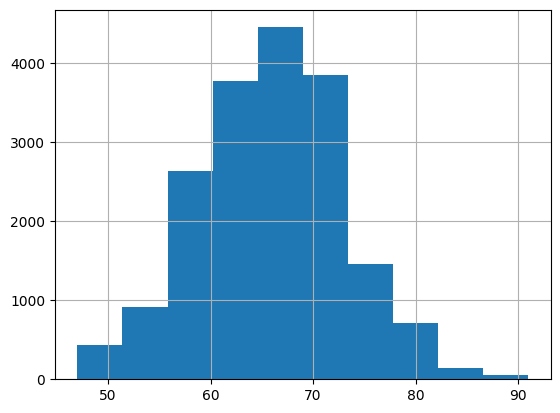

In [32]:
#overall	potential	value_eur	wage_eur	age	dob	height_cm	weight_kg
dataframe['overall'].hist()

<Axes: >

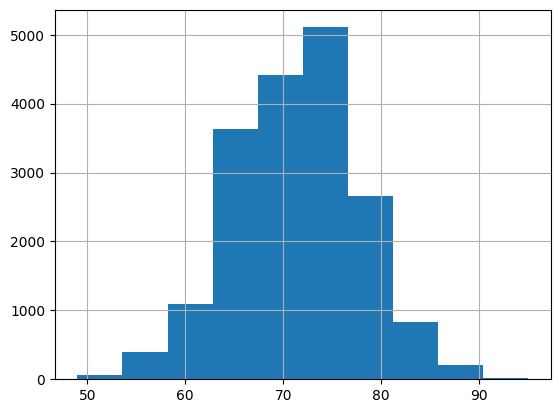

In [33]:
#overall	potential	value_eur	wage_eur	age	dob	height_cm	weight_kg
dataframe['potential'].hist()

<Axes: >

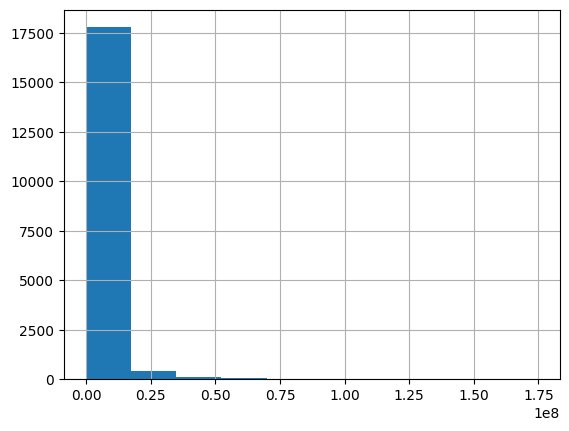

In [34]:
#overall	potential	value_eur	wage_eur	age	dob	height_cm	weight_kg
dataframe['value_eur'].hist()

<Axes: >

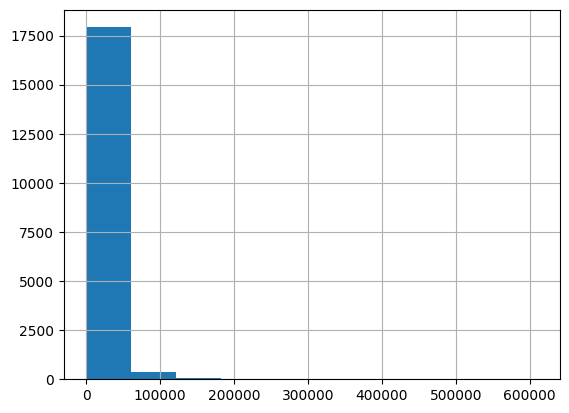

In [35]:
#overall	potential	value_eur	wage_eurwage_eur	age	dob	height_cm	weight_kg
test=dataframe['wage_eur'].hist()
test

<Axes: xlabel='overall', ylabel='potential'>

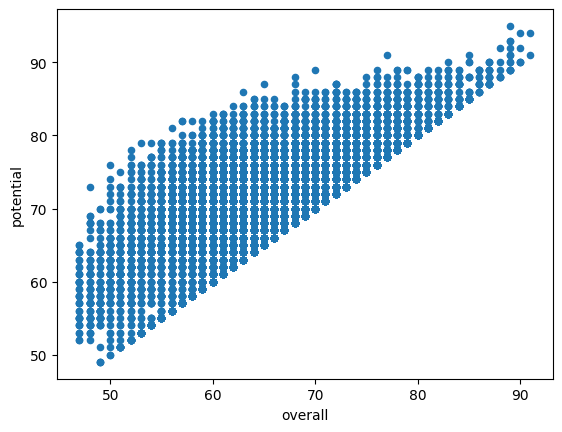

In [36]:
dataframe.plot.scatter(x='overall',y='potential')

In [37]:
#Identifying correlations with subplot

Text(0.5, 0, 'salaire en euros')

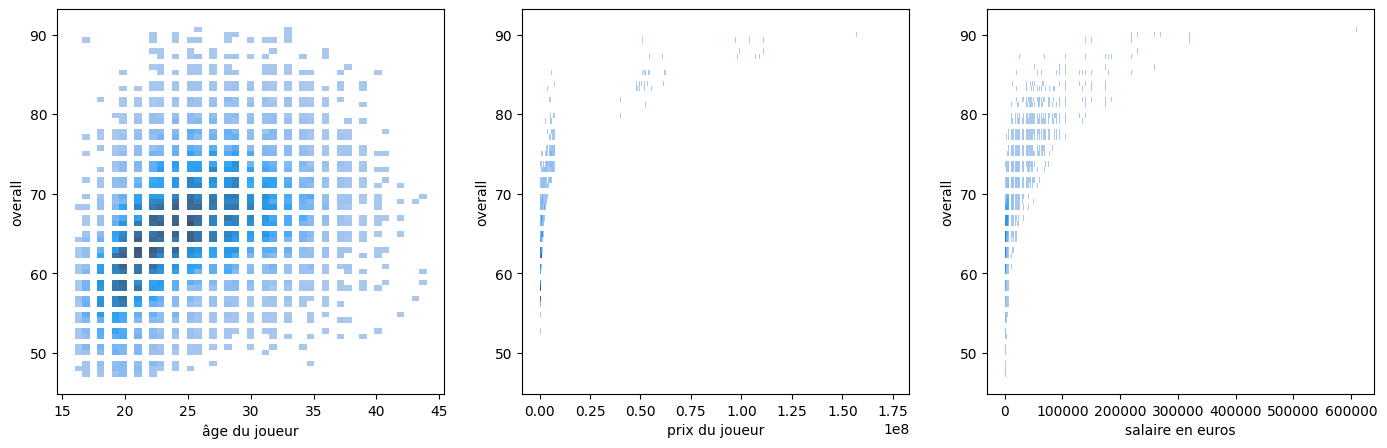

In [38]:
#	wage_eur,	age
plt.figure(figsize=(17,5))
plt.subplot(1, 3, 1)
sns.histplot(data=dataframe, x='age', y='overall')
plt.xlabel('âge du joueur')
plt.subplot(1, 3, 2)
sns.histplot(data=dataframe,x='value_eur', y='overall')
plt.xlabel('prix du joueur')
plt.subplot(1, 3, 3)
sns.histplot(data=dataframe,x='wage_eur', y='overall')
plt.xlabel('salaire en euros')

In [39]:
#conclusion not as significant as we would expect... we can analyse more and more the data visually in order to find correlation or to understand distribution. Here there is only presomption of correlation on overalll/age

**comment: some of the value are equally or symetrically distributed whereas others are very concentrated**

In [40]:
#We can  decide to isolate numerical and categorical value. We know that ur data are not equally distributed. 
#Our data set is not completelly clean but we will use other models later on to deal with this
skill_list=['club_position',
 'club_jersey_number',
 'club_loaned_from',
 'club_joined_date',
 'club_contract_valid_until_year',
 'nationality_id',
 'nationality_name',
 'nation_team_id',
 'nation_position',
 'nation_jersey_number',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'player_traits',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking_awareness',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes',
 'goalkeeping_speed']

In [41]:
#some of the columsn are dropped to simplfy our analysis because we do not need them

In [42]:
# dropcolumns dans le dataframe
drop_columns=['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk',
 'player_face_url']

In [43]:
definit_dataframe=dataframe.drop(columns=drop_columns, level=None, inplace=False, errors='raise')
definit_dataframe

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,252371,/player/252371/jude-bellingham/260004/,26,4,2025-09-19,J. Bellingham,Jude Victor William Bellingham,"CAM, CM",90,94,...,90,77,79,77,14,11,10,5,8,NaN
1,239053,/player/239053/federico-valverde/260004/,26,4,2025-09-19,F. Valverde,Federico Santiago Valverde Dipetta,"CM, CDM, RB",89,90,...,84,82,87,86,6,10,6,15,8,NaN
2,212622,/player/212622/joshua-kimmich/260004/,26,4,2025-09-19,J. Kimmich,Joshua Walter Kimmich,"CDM, RB, CM",89,89,...,86,82,86,85,8,15,7,15,15,NaN
3,235212,/player/235212/achraf-hakimi/260004/,26,4,2025-09-19,A. Hakimi,Achraf Hakimi Mouhأشرف حكيمي,"RB, RM",89,90,...,84,82,85,79,10,8,14,6,8,NaN
4,224232,/player/224232/nicolo-barella/260004/,26,4,2025-09-19,N. Barella,Nicolò Barella,CM,87,87,...,88,80,85,80,11,5,13,14,11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18400,267946,/player/267946/jun-sub-lim/260004/,26,4,2025-09-19,Lim Jun Sub,Joon-seob Im임준섭,GK,48,54,...,32,12,10,13,45,51,52,46,52,23.0
18401,76593,/player/76593/jianxian-yu/260004/,26,4,2025-09-19,Yu Jianxian,Jianxian Yu,GK,49,56,...,38,9,11,10,46,54,49,43,51,19.0
18402,77205,/player/77205/man-ho-park/260004/,26,4,2025-09-19,Park Man Ho,Man Ho Park,GK,48,59,...,33,9,14,11,48,52,45,42,54,20.0
18403,278149,/player/278149/dipesh-chauhan/260004/,26,4,2025-09-19,D. Chauhan,Dipesh Chauhan,GK,51,61,...,25,8,14,12,60,51,45,46,52,31.0


<Axes: xlabel='overall', ylabel='value_eur'>

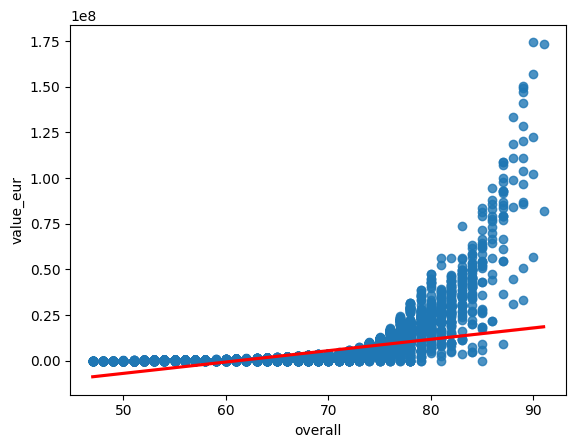

In [44]:
#test devisualisation par exemple sur lees donnes en euro
import seaborn as sns
sns.regplot(data=dataframe, x='overall', y='value_eur', scatter=True, label=None, line_kws={'color':'r'})

In [45]:
#if we can see correlation between overall and value there are anywat huge differences between some of the perf and value for ex. 90 overall for a value that can vary between 0.75 and 1.75

In [46]:
# import plotly.graph_objects as go

# fig = go.Figure(data=go.Scatter(
#     x=[1, 2, 3, 4],
#     y=[10, 11, 12, 13],
#     mode='markers',
#     marker=dict(size=[40, 60, 80, 100],
#                 color=[0, 1, 2, 3])
# ))

# fig.show()

In [47]:
#Comment : value in euro is correlated to performance however there still exist huge difference for a same level of achievment

***Part 2 - Preprocessing***

**2.1 Preparing for training and testing - data are prepared and split**

In [63]:
#Whenever randomization is part of a Scikit-learn algorithm, a random_state parameter may be provided to control the random number generator used. Note that the mere presence of random_state doesn’t mean that randomization is always used, as it may be dependent on another parameter, e.g. shuffle, being set.
#The passed value will have an effect on the reproducibility of the results returned by the function (fit, split, or any other function like k_means). random_state’s value may be:
x = dataframe.select_dtypes(exclude='object').drop(columns=['overall'])
y = dataframe['overall']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [125]:
#revoir si erreur ou si kernel
#numerical=dataframe.select_dtypes(exclude='object')
#categorical=dataframe.select_dtypes(include='object')
# from sklearn.impute import SimpleImputer #completing
# from sklearn.preprocessing import MinMaxScaler #standardizing of numerical
# from sklearn.preprocessing import OneHotEncoder #standardizing of categorical
# from sklearn.preprocessing import OneHotEncoder #standardizing of categorical
# from sklearn.pipeline import Pipeline
# from sklearn.compose import make_column_transformer

numerical_pipeline_models=Pipeline([
    ('numerical_imputer', SimpleImputer(strategy='mean')),
    ('numerical_scaler', MinMaxScaler(copy=True, clip=False))
     ])

In [126]:
categorical_pipeline_models=Pipeline([
    ('categorical_imputer', SimpleImputer(strategy='most_frequent')),
    ('categorical_OHE', OneHotEncoder(categories='auto', drop='if_binary', sparse_output=True, handle_unknown='ignore'))])

In [127]:
preprocessing=make_column_transformer([
    ('cat',dataframe.select_dtypes(include='object').columns),
    ('num',dataframe.select_dtypes(include='object').columns)])

AttributeError: 'numpy.int64' object has no attribute 'select_dtypes'

In [67]:
categorical_pipeline_models

Pipeline(steps=[('categorical_imputer',
                 SimpleImputer(strategy='most_frequent')),
                ('categorical_OHE',
                 OneHotEncoder(drop='if_binary', handle_unknown='ignore'))])

In [68]:
numerical_pipeline_models

Pipeline(steps=[('numerical_imputer', SimpleImputer()),
                ('numerical_scaler', MinMaxScaler())])

***2.2 Model(s) choice(s)***

In [54]:
#mreminder : #ma target = ['overall']

In [69]:
#y = dataframe['overall']
model = linear_model.LinearRegression()

# Entraîner le modèle une seule fois
model.fit(x_train, y_train)

# Faire des prédictions sur les données de test
y_pred = model.predict(x_test)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [128]:
#vérifier demain ou demander au wagon

***2.3 Evalute the model***

In [136]:
# #evaluate the slope
# slope=model.coef_[0]
# slope

In [137]:
# # Optionnel : évaluer la performance
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

In [138]:
#grid search witha root mean squared

In [139]:
# cv_validation_score = cross_validate(grid_search.best_estimators_,cv=5, scoring=‘rmse_neg’).mean()
# grid_search.best_estimator_.predict(x_test)

In [ ]:
# #Scoring with another linear model 
# model = Ridge()

# # Entraîner le modèle une seule fois
# pipe_ridge=make_pipeline(preprocessing, model)

# # Faire des prédictions sur les données de test
# cv_validation_score2 = cross_validate(pipe_ridge, x, y, cv=5, scoring=rmse).mean()

***3. Make a prediction***

IndexError: invalid index to scalar variable.

In [149]:
# #reminder target =y = 'overall'
# #one feature = x1 = 'wage_eur'

# new_data_point=pd.dataframe.from_dict({'wage_eur'=10097})
# prediction=model.predict(new_data_point)[0]

SyntaxError: cannot assign to literal here. Maybe you meant '==' instead of '='? (1401715180.py, line 4)